### Importing all Libraries

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn import metrics
%matplotlib inline

In [101]:
df = pd.read_csv('data_stocks.csv')
print(df.shape)
df.head()

(41266, 502)


DATE      SP500  NASDAQ.AAL  NASDAQ.AAPL  NASDAQ.ADBE  NASDAQ.ADI  \
0  1491226200  2363.6101     42.3300     143.6800     129.6300      82.040   
1  1491226260  2364.1001     42.3600     143.7000     130.3200      82.080   
2  1491226320  2362.6799     42.3100     143.6901     130.2250      82.030   
3  1491226380  2364.3101     42.3700     143.6400     130.0729      82.000   
4  1491226440  2364.8501     42.5378     143.6600     129.8800      82.035   

   NASDAQ.ADP  NASDAQ.ADSK  NASDAQ.AKAM  NASDAQ.ALXN  ...  NYSE.WYN  NYSE.XEC  \
0    102.2300      85.2200       59.760       121.52  ...    84.370   119.035   
1    102.1400      85.6500       59.840       121.48  ...    84.370   119.035   
2    102.2125      85.5100       59.795       121.93  ...    84.585   119.260   
3    102.1400      85.4872       59.620       121.44  ...    84.460   119.260   
4    102.0600      85.7001       59.620       121.60  ...    84.470   119.610   

   NYSE.XEL  NYSE.XL  NYSE.XOM  NYSE.XRX  NYSE.XYL  NYSE.YUM  NYSE.ZBH  \
0     44.40    39.88     82.03      7.36     50.22     63.86   122.000   
1     44.11    39.88     82.03      7.38     50.22     63.74   121.770   
2     44.09    39.98     82.02      7.36     50.12     63.75   121.700   
3     44.25    39.99     82.02      7.35     50.16     63.88   121.700   
4     44.11    39.96     82.03      7.36     50.20     63.91   121.695   

   NYSE.ZTS  
0    53.350  
1    53.350  
2    53.365  
3    53.380  
4    53.240  

[5 rows x 502 columns]

In [102]:
del df['DATE']

In [103]:
df.head()

SP500  NASDAQ.AAL  NASDAQ.AAPL  NASDAQ.ADBE  NASDAQ.ADI  NASDAQ.ADP  \
0  2363.6101     42.3300     143.6800     129.6300      82.040    102.2300   
1  2364.1001     42.3600     143.7000     130.3200      82.080    102.1400   
2  2362.6799     42.3100     143.6901     130.2250      82.030    102.2125   
3  2364.3101     42.3700     143.6400     130.0729      82.000    102.1400   
4  2364.8501     42.5378     143.6600     129.8800      82.035    102.0600   

   NASDAQ.ADSK  NASDAQ.AKAM  NASDAQ.ALXN  NASDAQ.AMAT  ...  NYSE.WYN  \
0      85.2200       59.760       121.52        38.99  ...    84.370   
1      85.6500       59.840       121.48        39.01  ...    84.370   
2      85.5100       59.795       121.93        38.91  ...    84.585   
3      85.4872       59.620       121.44        38.84  ...    84.460   
4      85.7001       59.620       121.60        38.93  ...    84.470   

   NYSE.XEC  NYSE.XEL  NYSE.XL  NYSE.XOM  NYSE.XRX  NYSE.XYL  NYSE.YUM  \
0   119.035     44.40    39.88     82.03      7.36     50.22     63.86   
1   119.035     44.11    39.88     82.03      7.38     50.22     63.74   
2   119.260     44.09    39.98     82.02      7.36     50.12     63.75   
3   119.260     44.25    39.99     82.02      7.35     50.16     63.88   
4   119.610     44.11    39.96     82.03      7.36     50.20     63.91   

   NYSE.ZBH  NYSE.ZTS  
0   122.000    53.350  
1   121.770    53.350  
2   121.700    53.365  
3   121.700    53.380  
4   121.695    53.240  

[5 rows x 501 columns]

In [104]:
df.describe()

SP500    NASDAQ.AAL   NASDAQ.AAPL  NASDAQ.ADBE    NASDAQ.ADI  \
count  41266.000000  41266.000000  41266.000000  41266.00000  41266.000000   
mean    2421.537882     47.708346    150.453566    141.31793     79.446873   
std       39.557135      3.259377      6.236826      6.91674      2.000283   
min     2329.139900     40.830000    140.160000    128.24000     74.800000   
25%     2390.860100     44.945400    144.640000    135.19500     78.030000   
50%     2430.149900     48.360000    149.945000    142.26000     79.410000   
75%     2448.820100     50.180000    155.065000    147.10000     80.580000   
max     2490.649900     54.475000    164.510000    155.33000     90.440000   

         NASDAQ.ADP   NASDAQ.ADSK   NASDAQ.AKAM   NASDAQ.ALXN   NASDAQ.AMAT  \
count  41266.000000  41266.000000  41266.000000  41266.000000  41266.000000   
mean     103.480398    102.998608     50.894352    122.981163     43.291988   
std        4.424244      9.389788      4.833931     11.252010      2.448582   
min       95.870000     83.000000     44.650000     96.250000     37.460000   
25%      101.300000     94.820000     47.440000    116.950000     41.690000   
50%      102.440000    106.820000     49.509900    123.620000     43.650000   
75%      104.660000    110.490000     52.230000    132.218800     44.935000   
max      121.770000    119.270000     62.560000    142.875000     47.830000   

       ...      NYSE.WYN      NYSE.XEC      NYSE.XEL       NYSE.XL  \
count  ...  41266.000000  41266.000000  41266.000000  41266.000000   
mean   ...     97.942211    104.740666     46.664402     43.043984   
std    ...      5.411795     10.606694      1.508444      1.714533   
min    ...     83.410000     89.510000     44.090000     39.120000   
25%    ...     95.960000     95.010000     45.155000     41.955000   
50%    ...     99.250000     99.660000     46.810000     43.200000   
75%    ...    102.080000    117.034700     47.730000     44.370000   
max    ...    106.375000    123.870000     49.660000     47.210000   

           NYSE.XOM      NYSE.XRX      NYSE.XYL      NYSE.YUM      NYSE.ZBH  \
count  41266.000000  41266.000000  41266.000000  41266.000000  41266.000000   
mean      80.784595     19.300718     54.541988     71.757891    121.423515   
std        1.840989     11.686532      3.526321      4.038272      5.607070   
min       76.060000      6.660000     48.820000     63.180000    110.120000   
25%       80.220000      7.045000     51.630000     69.110000    117.580000   
50%       81.150000     27.890000     53.850000     73.470000    120.650000   
75%       82.062050     30.470000     57.140000     74.750000    126.000000   
max       83.630000     32.930000     62.130000     77.120000    133.450000   

           NYSE.ZTS  
count  41266.000000  
mean      60.183874  
std        3.346887  
min       52.300000  
25%       59.620000  
50%       61.585600  
75%       62.540000  
max       63.840000  

[8 rows x 501 columns]

In [105]:
print(f'Number of Share Name:{len(df.columns)}')

Number of Share Name:501


In [106]:
print('Number of null values:',df.isnull().sum().sum()) 

Number of null values: 0


In [107]:
 df1 = df.T.copy()

In [108]:
df1.head()

0          1          2          3          4          5      \
SP500        2363.6101  2364.1001  2362.6799  2364.3101  2364.8501  2365.6201   
NASDAQ.AAL     42.3300    42.3600    42.3100    42.3700    42.5378    42.5399   
NASDAQ.AAPL   143.6800   143.7000   143.6901   143.6400   143.6600   143.7800   
NASDAQ.ADBE   129.6300   130.3200   130.2250   130.0729   129.8800   130.0700   
NASDAQ.ADI     82.0400    82.0800    82.0300    82.0000    82.0350    82.0400   

                6        7          8          9      ...      41256    41257  \
SP500        2365.200  2365.29  2364.3201  2364.6399  ...  2471.8899  2472.77   
NASDAQ.AAL     42.470    42.47    42.3900    42.3300  ...    44.7200    44.73   
NASDAQ.AAPL   143.864   143.81   143.8150   143.8000  ...   164.1600   164.06   
NASDAQ.ADBE   130.180   130.14   130.1000   130.2100  ...   155.0600   155.01   
NASDAQ.ADI     82.120    82.19    82.2300    82.1650  ...    83.7100    83.70   

                 41258      41259    41260    41261    41262     41263  \
SP500        2472.8999  2472.6399  2472.02  2472.22  2471.77  2470.030   
NASDAQ.AAL     44.7600    44.7500    44.71    44.72    44.73    44.740   
NASDAQ.AAPL   164.1900   164.2000   164.14   164.11   164.12   164.010   
NASDAQ.ADBE   155.1200   155.0900   155.04   155.09   155.16   155.065   
NASDAQ.ADI     83.6300    83.6900    83.66    83.67    83.65    83.620   

               41264    41265  
SP500        2471.49  2471.49  
NASDAQ.AAL     44.71    44.74  
NASDAQ.AAPL   163.88   163.98  
NASDAQ.ADBE   154.96   155.16  
NASDAQ.ADI     83.58    83.69  

[5 rows x 41266 columns]

In [109]:
len(df1.index)

501

In [110]:
df1.shape

(501, 41266)

### DBSCAN

In [111]:
X = StandardScaler().fit_transform(df1)

In [112]:
X.shape

(501, 41266)

In [113]:
db = DBSCAN(eps=1.6, min_samples=5).fit(X)

In [114]:
labels = db.labels_ 

In [115]:
data = pd.DataFrame(X)

In [116]:
data.head()

0          1          2          3          4          5      \
0  14.385350  14.374332  14.369139  14.386966  14.393405  14.397618   
1  -0.363914  -0.363631  -0.364154  -0.363480  -0.362541  -0.362595   
2   0.280057   0.279656   0.279563   0.279852   0.279988   0.280657   
3   0.190784   0.194723   0.194066   0.193665   0.192430   0.193547   
4  -0.111600  -0.111496  -0.111950  -0.111725  -0.111576  -0.111622   

       6          7          8          9      ...      41256      41257  \
0  14.392048  14.387627  14.383770  14.385886  ...  14.094283  14.100969   
1  -0.363041  -0.362926  -0.363447  -0.363566  ...  -0.352010  -0.351869   
2   0.281063   0.280611   0.280731   0.280891  ...   0.358886   0.358439   
3   0.194135   0.193803   0.193623   0.194578  ...   0.304724   0.304569   
4  -0.111165  -0.110693  -0.110412  -0.110566  ...  -0.119945  -0.119901   

       41258      41259      41260      41261      41262      41263  \
0  14.099170  14.096639  14.095529  14.097694  14.093500  14.088682   
1  -0.351808  -0.351856  -0.352048  -0.351963  -0.351955  -0.351907   
2   0.358975   0.358997   0.358810   0.358704   0.358640   0.358246   
3   0.304995   0.304783   0.304646   0.305013   0.305311   0.304986   
4  -0.120475  -0.120122  -0.120214  -0.120114  -0.120308  -0.120409   

       41264      41265  
0  14.097096  14.090683  
1  -0.351743  -0.351746  
2   0.357785   0.357893  
3   0.304676   0.305402  
4  -0.120314  -0.119941  

[5 rows x 41266 columns]

In [117]:
data['Class'] = labels

In [118]:
data['Class'].unique()

array([-1,  0,  1])

In [119]:
df1['CLASS'] = labels

## Problem 1: 
There are various stocks for which we have collected a data set, which all stocks are apparently similar in performance

In [120]:
Similar_share1 = df1[df1['CLASS']==0]
Similar_share2 = df1[df1['CLASS']==1]
Disimilar_share = df1[df1['CLASS']==-1]

In [121]:
print(f'Number of Similar Stocks are:{len(Similar_share1)} and {len(Similar_share2)}')
print(f'Number of UnSimilar Stocks are:{len(Disimilar_share)}')

Number of Similar Stocks are:7 and 10
Number of UnSimilar Stocks are:484


In [122]:
print('Similar Stoks in Class One Are:-')
for stoks1 in Similar_share1.index:
    print(stoks1)
    

Similar Stoks in Class One Are:-
NASDAQ.AMD
NASDAQ.HBAN
NASDAQ.NAVI
NASDAQ.NWS
NASDAQ.NWSA
NYSE.FCX
NYSE.RF


In [123]:
print('Similar Stoks in Class Two Are:-')
for stoks2 in Similar_share2.index:
    print(stoks2)

Similar Stoks in Class Two Are:-
NASDAQ.PBCT
NYSE.COTY
NYSE.HPE
NYSE.HPQ
NYSE.HST
NYSE.KEY
NYSE.KIM
NYSE.KMI
NYSE.UA
NYSE.WU


In [124]:
print(f'Others :{len(Disimilar_share)} Stocks are Disimilar Stocks')

Others :484 Stocks are Disimilar Stocks


In [178]:
print('The Stocks which are not Similar to each other are:-\n')
for stoks3 in Disimilar_share.index:
    print(stoks3,end='  ')

The Stocks which are not Similar to each other are:-

SP500  NASDAQ.AAL  NASDAQ.AAPL  NASDAQ.ADBE  NASDAQ.ADI  NASDAQ.ADP  NASDAQ.ADSK  NASDAQ.AKAM  NASDAQ.ALXN  NASDAQ.AMAT  NASDAQ.AMGN  NASDAQ.AMZN  NASDAQ.ATVI  NASDAQ.AVGO  NASDAQ.BBBY  NASDAQ.BIIB  NASDAQ.CA  NASDAQ.CBOE  NASDAQ.CELG  NASDAQ.CERN  NASDAQ.CHRW  NASDAQ.CHTR  NASDAQ.CINF  NASDAQ.CMCSA  NASDAQ.CME  NASDAQ.COST  NASDAQ.CSCO  NASDAQ.CSX  NASDAQ.CTAS  NASDAQ.CTSH  NASDAQ.CTXS  NASDAQ.DISCA  NASDAQ.DISCK  NASDAQ.DISH  NASDAQ.DLTR  NASDAQ.EA  NASDAQ.EBAY  NASDAQ.EQIX  NASDAQ.ESRX  NASDAQ.ETFC  NASDAQ.EXPD  NASDAQ.EXPE  NASDAQ.FAST  NASDAQ.FB  NASDAQ.FFIV  NASDAQ.FISV  NASDAQ.FITB  NASDAQ.FLIR  NASDAQ.FOX  NASDAQ.FOXA  NASDAQ.GILD  NASDAQ.GOOG  NASDAQ.GOOGL  NASDAQ.GRMN  NASDAQ.GT  NASDAQ.HAS  NASDAQ.HOLX  NASDAQ.HSIC  NASDAQ.IDXX  NASDAQ.ILMN  NASDAQ.INCY  NASDAQ.INFO  NASDAQ.INTC  NASDAQ.INTU  NASDAQ.ISRG  NASDAQ.JBHT  NASDAQ.KHC  NASDAQ.KLAC  NASDAQ.LKQ  NASDAQ.LRCX  NASDAQ.MAR  NASDAQ.MAT  NASDAQ.MCHP  NASDAQ.MDLZ  NASDA

## Graphs of similar Stocks in Two Different Classes

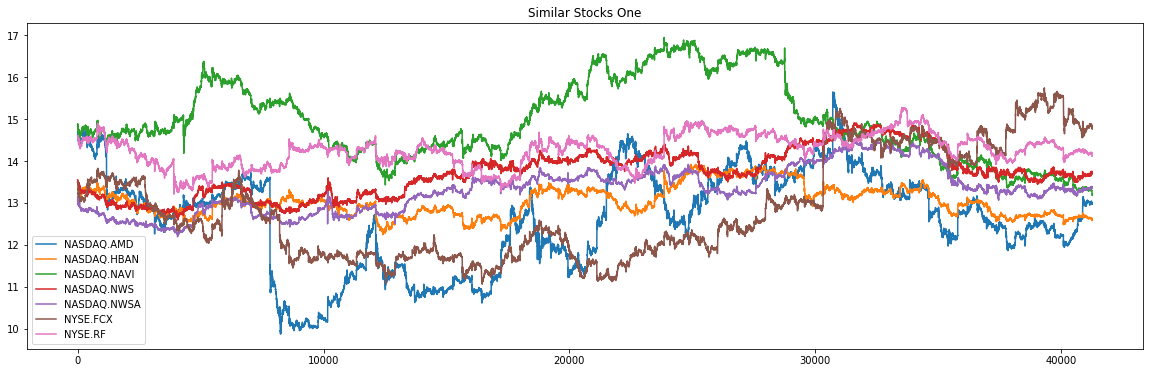

In [125]:
Stocks1 = df[Similar_share1.index]
Stocks1.plot(figsize=(20,6))
plt.title('Similar Stocks One')
plt.show()

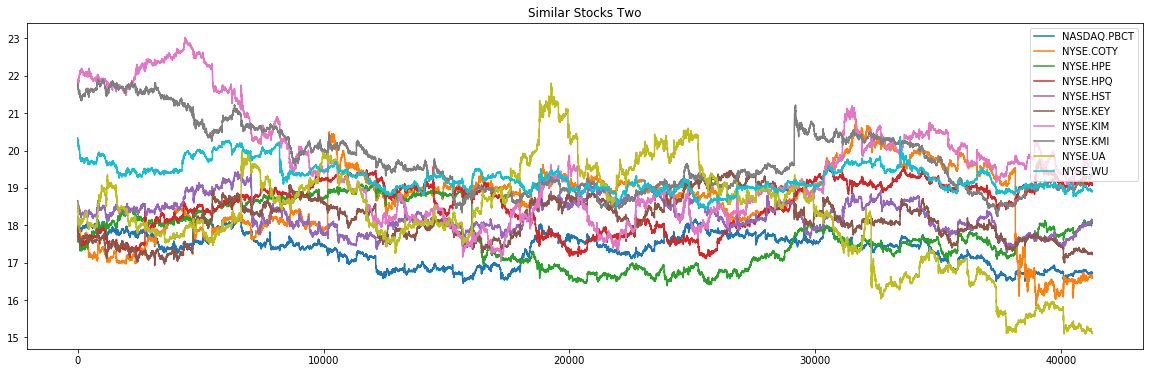

In [126]:
Stocks2 = df[Similar_share2.index]
Stocks2.plot(figsize=(20,6))
plt.title('Similar Stocks Two')
plt.show()

## Problem 2:
How many Unique patterns that exist in the historical stock data set, based on
fluctuations in price.

In [165]:
print(f"The number of Unique patterns that exist in the historical stock data set, based on fluctuations in price is: {len(df1['CLASS'].unique())}")

The number of Unique patterns that exist in the historical stock data set, based on fluctuations in price is: 3


## Problem 3:
Identify which all stocks are moving together and which all stocks are different from
each other.

In [167]:
print('The Stocks from class One which are Moving Together:')
for stoks1 in Similar_share1.index:
    print(stoks1)

The Stocks from class One which are Moving Together:
NASDAQ.AMD
NASDAQ.HBAN
NASDAQ.NAVI
NASDAQ.NWS
NASDAQ.NWSA
NYSE.FCX
NYSE.RF


In [168]:
print('The Stocks from class Two which are Moving Together:')
for stoks2 in Similar_share2.index:
    print(stoks2)

The Stocks from class Two which are Moving Together:
NASDAQ.PBCT
NYSE.COTY
NYSE.HPE
NYSE.HPQ
NYSE.HST
NYSE.KEY
NYSE.KIM
NYSE.KMI
NYSE.UA
NYSE.WU


In [171]:
print('The Stocks which are Different:\n\n',list(Disimilar_share.index))

The Stocks which are Different:

 ['SP500', 'NASDAQ.AAL', 'NASDAQ.AAPL', 'NASDAQ.ADBE', 'NASDAQ.ADI', 'NASDAQ.ADP', 'NASDAQ.ADSK', 'NASDAQ.AKAM', 'NASDAQ.ALXN', 'NASDAQ.AMAT', 'NASDAQ.AMGN', 'NASDAQ.AMZN', 'NASDAQ.ATVI', 'NASDAQ.AVGO', 'NASDAQ.BBBY', 'NASDAQ.BIIB', 'NASDAQ.CA', 'NASDAQ.CBOE', 'NASDAQ.CELG', 'NASDAQ.CERN', 'NASDAQ.CHRW', 'NASDAQ.CHTR', 'NASDAQ.CINF', 'NASDAQ.CMCSA', 'NASDAQ.CME', 'NASDAQ.COST', 'NASDAQ.CSCO', 'NASDAQ.CSX', 'NASDAQ.CTAS', 'NASDAQ.CTSH', 'NASDAQ.CTXS', 'NASDAQ.DISCA', 'NASDAQ.DISCK', 'NASDAQ.DISH', 'NASDAQ.DLTR', 'NASDAQ.EA', 'NASDAQ.EBAY', 'NASDAQ.EQIX', 'NASDAQ.ESRX', 'NASDAQ.ETFC', 'NASDAQ.EXPD', 'NASDAQ.EXPE', 'NASDAQ.FAST', 'NASDAQ.FB', 'NASDAQ.FFIV', 'NASDAQ.FISV', 'NASDAQ.FITB', 'NASDAQ.FLIR', 'NASDAQ.FOX', 'NASDAQ.FOXA', 'NASDAQ.GILD', 'NASDAQ.GOOG', 'NASDAQ.GOOGL', 'NASDAQ.GRMN', 'NASDAQ.GT', 'NASDAQ.HAS', 'NASDAQ.HOLX', 'NASDAQ.HSIC', 'NASDAQ.IDXX', 'NASDAQ.ILMN', 'NASDAQ.INCY', 'NASDAQ.INFO', 'NASDAQ.INTC', 'NASDAQ.INTU', 'NASDAQ.ISRG', 'NASDAQ

In [144]:
del d['Class']

## Making Clustering with k-Means with compressed data (2 Principal Components)

In [222]:
pca = PCA(n_components=2,random_state=0)
scaler = StandardScaler()
X = scaler.fit_transform(d)
pca.fit(X)

PCA(n_components=2, random_state=0)

In [223]:
X = pca.transform(X)

In [224]:
X = pd.DataFrame(X,columns=['1stPrinc','2ndPrinc'])

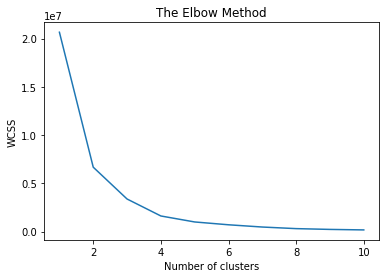

In [225]:
##Elbow Graph
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## According to elbow graph taking 4 classes to cluster...

## Clustering with Compressed Data

In [233]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++',max_iter=1000, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

In [235]:
centers = kmeans.cluster_centers_

In [236]:
centrex = centers[:,0]
centrey = centers[:,1]

In [237]:
X['Class'] = y_kmeans

In [238]:
X.head()

1stPrinc   2ndPrinc  Class
0  2851.552017  16.812359      1
1   -67.322123  -2.141776      0
2    59.046141  -1.580902      3
3    47.724978  -5.527465      3
4   -28.216508   0.780005      0

In [239]:
X['Class'].unique()

array([1, 0, 3, 2], dtype=int32)

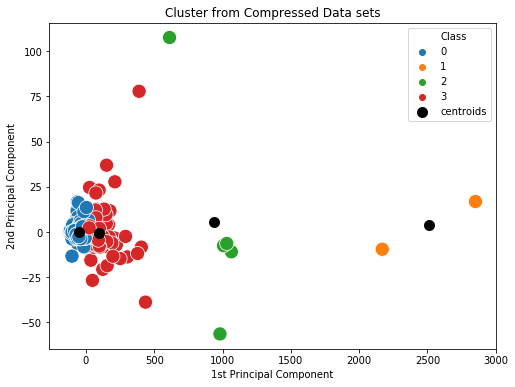

In [240]:
plt.figure(figsize=(8,6))
sns.scatterplot(X['1stPrinc'],X['2ndPrinc'],hue=X['Class'],s=200,markers='o',palette='tab10')
plt.scatter(centrex,centrey,color='k',marker='o',linewidths=5,label='centroids')
plt.title('Cluster from Compressed Data sets')
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.legend()
plt.show()

#### From the above Cluster we can see that - 
* 1) Stocks belongs to Class zero are quite similar(Blue)..

* 2) Stocks belongs to Class one are similar(Orange)..

* 3) Stocks belongs to Class two are very different from each other(Green)..

* 4) Stocks belongs to Class three are similar but few noise are present(Red)..

In [242]:
d['Class'] = y_kmeans

In [243]:
zero = d[d['Class']==0]
one = d[d['Class']==1]
two = d[d['Class']==2]
three = d[d['Class']==3]

In [245]:
print(f'Without removing Noise in zero class number of stocks are  :{len(zero.index)}')
print(f'Without removing Noise in one class number of stocks are   :{len(one.index)}')
print(f'Without removing Noise in two class number of stocks are   :{len(two.index)}')
print(f'Without removing Noise in three class number of stocks are :{len(three.index)}')

Without removing Noise in zero class number of stocks are  :382
Without removing Noise in one class number of stocks are   :2
Without removing Noise in two class number of stocks are   :5
Without removing Noise in three class number of stocks are :112


In [246]:
print('Stocks in Class Zero are:\n')
for stoks0 in zero.index:
    print(stoks0,end='  ')

Stocks in Class Zero are:

NASDAQ.AAL  NASDAQ.ADI  NASDAQ.ADP  NASDAQ.ADSK  NASDAQ.AKAM  NASDAQ.AMAT  NASDAQ.AMD  NASDAQ.ATVI  NASDAQ.BBBY  NASDAQ.CA  NASDAQ.CBOE  NASDAQ.CERN  NASDAQ.CHRW  NASDAQ.CINF  NASDAQ.CMCSA  NASDAQ.CSCO  NASDAQ.CSX  NASDAQ.CTSH  NASDAQ.CTXS  NASDAQ.DISCA  NASDAQ.DISCK  NASDAQ.DISH  NASDAQ.DLTR  NASDAQ.EA  NASDAQ.EBAY  NASDAQ.ESRX  NASDAQ.ETFC  NASDAQ.EXPD  NASDAQ.FAST  NASDAQ.FITB  NASDAQ.FLIR  NASDAQ.FOX  NASDAQ.FOXA  NASDAQ.GILD  NASDAQ.GRMN  NASDAQ.GT  NASDAQ.HAS  NASDAQ.HBAN  NASDAQ.HOLX  NASDAQ.INFO  NASDAQ.INTC  NASDAQ.JBHT  NASDAQ.KHC  NASDAQ.KLAC  NASDAQ.LKQ  NASDAQ.MAR  NASDAQ.MAT  NASDAQ.MCHP  NASDAQ.MDLZ  NASDAQ.MNST  NASDAQ.MSFT  NASDAQ.MU  NASDAQ.MYL  NASDAQ.NAVI  NASDAQ.NDAQ  NASDAQ.NTAP  NASDAQ.NTRS  NASDAQ.NWS  NASDAQ.NWSA  NASDAQ.PAYX  NASDAQ.PBCT  NASDAQ.PCAR  NASDAQ.PDCO  NASDAQ.PYPL  NASDAQ.QCOM  NASDAQ.QRVO  NASDAQ.ROST  NASDAQ.SBUX  NASDAQ.SNI  NASDAQ.SNPS  NASDAQ.SPLS  NASDAQ.SRCL  NASDAQ.STX  NASDAQ.SWKS  NASDAQ.SYMC  NASDAQ.TRIP  NASDA

In [247]:
print('Stocks in Class one are:\n')
for stoks1 in one.index:
    print(stoks1)

Stocks in Class one are:

SP500
NASDAQ.PCLN


In [248]:
print('Stocks in Class Two are:\n')
for stoks2 in two.index:
    print(stoks2)

Stocks in Class Two are:

NASDAQ.AMZN
NASDAQ.GOOG
NASDAQ.GOOGL
NASDAQ.ISRG
NYSE.AZO


In [249]:
print('Stocks in Class Three are:\n')
for stoks3 in three.index:
    print(stoks3,end='  ')

Stocks in Class Three are:

NASDAQ.AAPL  NASDAQ.ADBE  NASDAQ.ALXN  NASDAQ.AMGN  NASDAQ.AVGO  NASDAQ.BIIB  NASDAQ.CELG  NASDAQ.CHTR  NASDAQ.CME  NASDAQ.COST  NASDAQ.CTAS  NASDAQ.EQIX  NASDAQ.EXPE  NASDAQ.FB  NASDAQ.FFIV  NASDAQ.FISV  NASDAQ.HSIC  NASDAQ.IDXX  NASDAQ.ILMN  NASDAQ.INCY  NASDAQ.INTU  NASDAQ.LRCX  NASDAQ.NFLX  NASDAQ.NVDA  NASDAQ.ORLY  NASDAQ.REGN  NASDAQ.ULTA  NASDAQ.VRTX  NASDAQ.WLTW  NASDAQ.WYNN  NYSE.AAP  NYSE.ACN  NYSE.ADS  NYSE.AET  NYSE.AGN  NYSE.AMG  NYSE.AMP  NYSE.AMT  NYSE.ANTM  NYSE.AON  NYSE.APD  NYSE.AVB  NYSE.AYI  NYSE.BA  NYSE.BCR  NYSE.BDX  NYSE.BLK  NYSE.BRK.B  NYSE.BXP  NYSE.CB  NYSE.CI  NYSE.CLX  NYSE.CMG  NYSE.CMI  NYSE.COO  NYSE.CXO  NYSE.DE  NYSE.ECL  NYSE.EFX  NYSE.ESS  NYSE.FDX  NYSE.FRT  NYSE.GD  NYSE.GS  NYSE.GWW  NYSE.HD  NYSE.HON  NYSE.HUM  NYSE.IBM  NYSE.IFF  NYSE.IT  NYSE.ITW  NYSE.JNJ  NYSE.KMB  NYSE.LH  NYSE.LLL  NYSE.LMT  NYSE.MA  NYSE.MCD  NYSE.MCK  NYSE.MCO  NYSE.MHK  NYSE.MLM  NYSE.MMM  NYSE.MTB  NYSE.NEE  NYSE.NOC  NYSE.PH  NYSE.PNC  NYS

### Similar Stocks of zero Class extracted from compressed data sets (including noises)

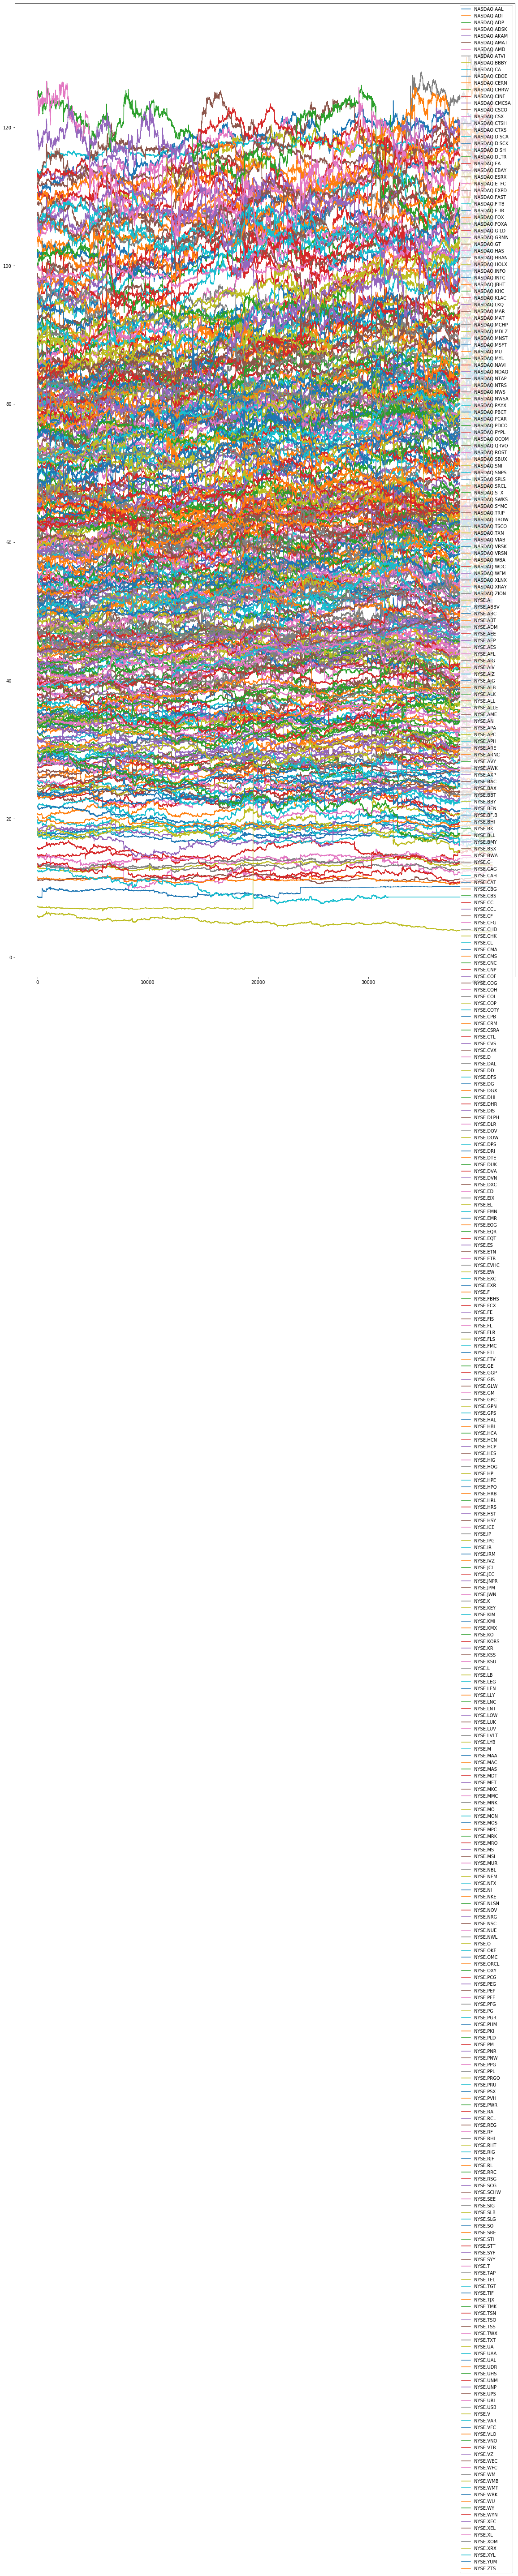

In [250]:
df[zero.index].plot(figsize=(20,40))
plt.show()

### Similar Stocks of one Class extracted from compressed data sets

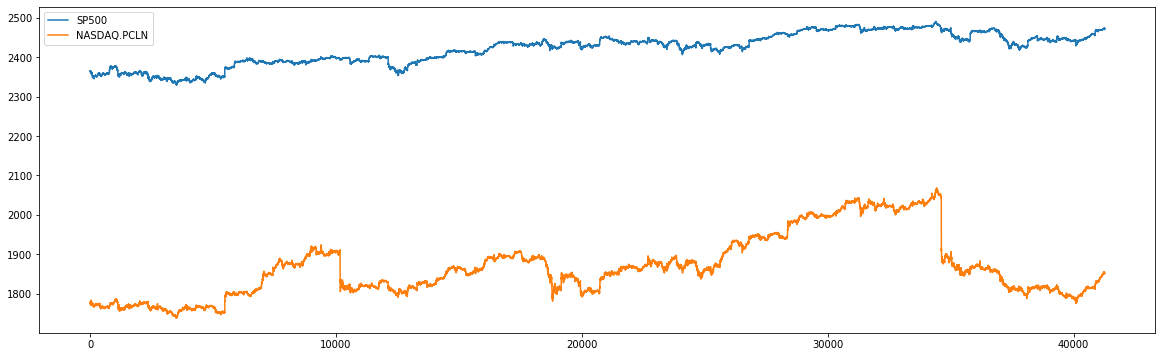

In [251]:
df[one.index].plot(figsize=(20,6))
plt.show()

### Similar Stocks of two Class extracted from compressed data sets

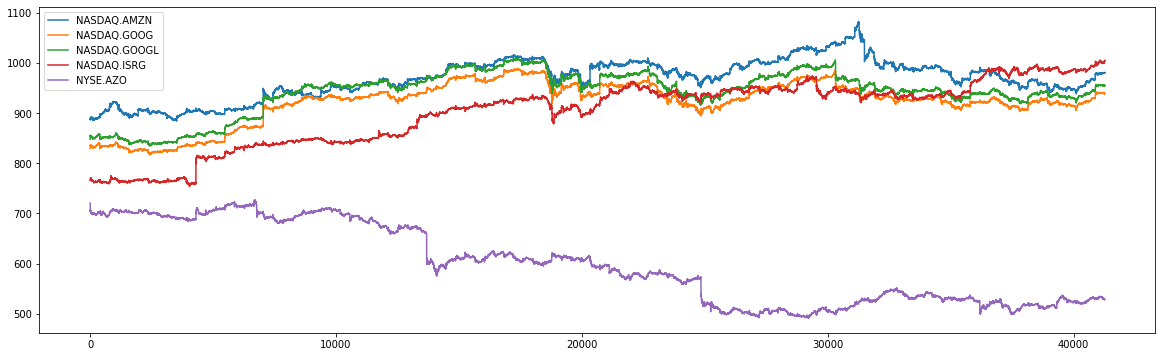

In [252]:
df[two.index].plot(figsize=(20,6))
plt.show()

### Similar Stocks of Three Class extracted from compressed data sets

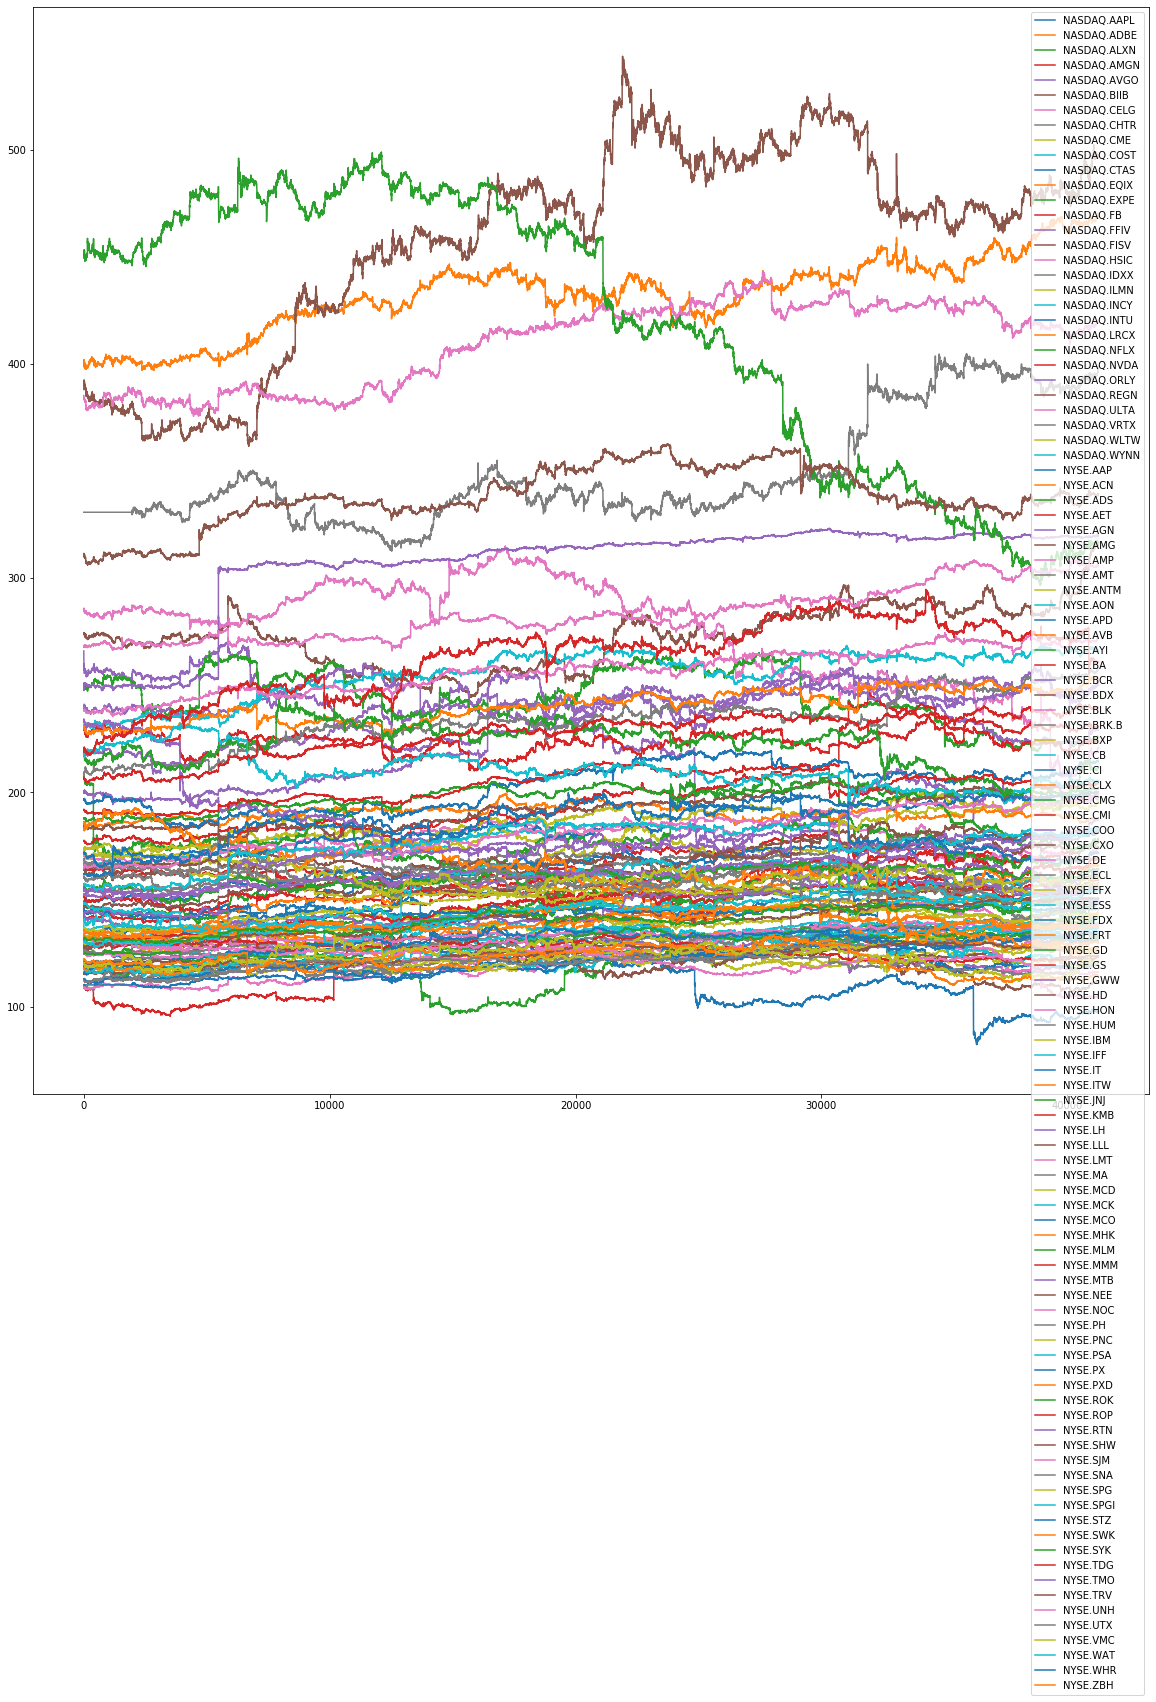

In [253]:
df[three.index].plot(figsize=(20,20))
plt.show()